In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
from tensorflow.keras.layers import Flatten, Dense, SimpleRNN, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

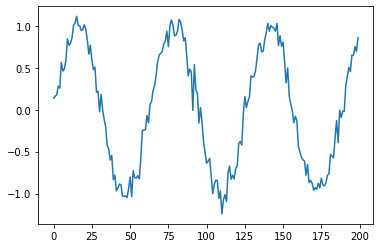

In [12]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)

In [13]:
T = 10
X = []
Y = []
D = 1
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (190, 10, 1) Y.shape: (190,)


In [0]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i ,x)
model.compile(optimizer=Adam(lr=0.1),
              loss='mse')


In [29]:
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 7ms/sample - loss: 0.2736 - val_loss: 0.1319
Epoch 2/80
95/95 [==============================] - 0s 386us/sample - loss: 0.0745 - val_loss: 0.0840
Epoch 3/80
95/95 [==============================] - 0s 362us/sample - loss: 0.1006 - val_loss: 0.0625
Epoch 4/80
95/95 [==============================] - 0s 395us/sample - loss: 0.0556 - val_loss: 0.0466
Epoch 5/80
95/95 [==============================] - 0s 364us/sample - loss: 0.0482 - val_loss: 0.0571
Epoch 6/80
95/95 [==============================] - 0s 413us/sample - loss: 0.0564 - val_loss: 0.0432
Epoch 7/80
95/95 [==============================] - 0s 416us/sample - loss: 0.0442 - val_loss: 0.0406
Epoch 8/80
95/95 [==============================] - 0s 441us/sample - loss: 0.0369 - val_loss: 0.0346
Epoch 9/80
95/95 [==============================] - 0s 404us/sample - loss: 0.0361 - val_loss: 0.0389
Epoch 10/80
95/95 [=====================

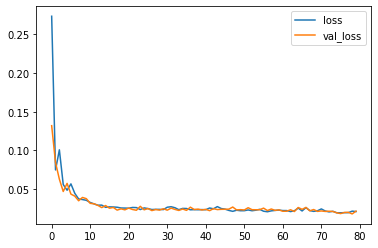

In [30]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2
while len(validation_prediction)< len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0, 0]
  i+=1
  validation_prediction.append(p)

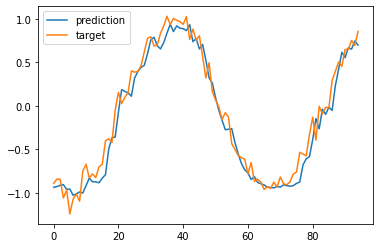

In [32]:
plt.plot(validation_prediction, label = "prediction")
plt.plot(validation_target, label='target')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2] 
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


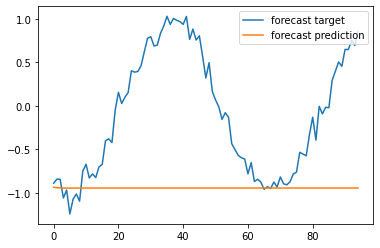

In [34]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()